In [441]:
from IPython.display import display, clear_output
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

import torch
import torch.nn as nn

In [1055]:
meta_full_df = pd.read_csv('./csv/symbols_valid_meta.csv')
meta_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nasdaq Traded     8049 non-null   object 
 1   Symbol            8049 non-null   object 
 2   Security Name     8049 non-null   object 
 3   Listing Exchange  8049 non-null   object 
 4   Market Category   8049 non-null   object 
 5   ETF               8049 non-null   object 
 6   Round Lot Size    8049 non-null   float64
 7   Test Issue        8049 non-null   object 
 8   Financial Status  3383 non-null   object 
 9   CQS Symbol        4666 non-null   object 
 10  NASDAQ Symbol     8049 non-null   object 
 11  NextShares        8049 non-null   object 
dtypes: float64(1), object(11)
memory usage: 754.7+ KB


In [1198]:
stock_list = \
["AAPL","MSFT","GOOG","AMZN","FB","TSLA","BABA","NVDA","PYPL","CRM","INTC","AMD","ATVI","MTCH","EA","TTD","ZG","YELP",]+ \
["XOM","CVX","RDS","NEE","FSLR","EMR","LNG","SEDG","BP","PDCE","CRC","TTE","NESR"]+ \
["ABBV","PFE","UNH","XLV","SAGE","BIO","QDEL","PKI","PPD","BSX","MRNA","NVCR","NTRA"]+ \
["WFC","GS","MS","XLF","RKT","ATH","ORI","RE","JEF","FITB","SLM","OMF","WAL"]

In [ ]:
sector = {
            "Technology":["AAPL","MSFT","GOOG","AMZN","FB","TSLA","BABA","NVDA","PYPL","CRM","INTC","AMD","ATVI","MTCH","EA","TTD","ZG","YELP"],
            "Energy":["XOM","CVX","RDS","NEE","FSLR","EMR","LNG","SEDG","BP","PDCE","CRC","TTE","NESR"],
            "Health":["ABBV","PFE","UNH","XLV","SAGE","BIO","QDEL","PKI","PPD","BSX","MRNA","NVCR","NTRA"],
            "Finance":["WFC","GS","MS","XLF","RKT","ATH","ORI","RE","JEF","FITB","SLM","OMF","WAL"]
         }

In [ ]:
def get_ticker(idx):
    return meta_df[meta_df.index == idx].Symbol.values[0]

def get_sector(ticker):
    for k,v in sector.items():
        if ticker in v:
            return k
    return "N/A"

In [1199]:
meta_df = meta_full_df[meta_full_df.Symbol.isin(stock_list)]#.sample(135)
meta_df=meta_df.reset_index()

In [1200]:
meta_df

,index,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,12,Y,AAPL,Apple Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,AAPL,N
1,20,Y,ABBV,AbbVie Inc. Common Stock,N,,N,100.0,N,NaN,ABBV,ABBV,N
2,293,Y,AMD,"Advanced Micro Devices, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,AMD,N
3,336,Y,AMZN,"Amazon.com, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,AMZN,N
4,498,Y,ATH,Athene Holding Ltd. Class A Common Shares,N,,N,100.0,N,NaN,ATH,ATH,N
5,524,Y,ATVI,"Activision Blizzard, Inc - Common Stock",Q,Q,N,100.0,N,N,NaN,ATVI,N
6,606,Y,BABA,Alibaba Group Holding Limited American Deposit...,N,,N,100.0,N,NaN,BABA,BABA,N
7,769,Y,BIO,"Bio-Rad Laboratories, Inc. Class A Common Stock",N,,N,100.0,N,NaN,BIO,BIO,N
8,879,Y,BP,BP p.l.c. Common Stock,N,,N,100.0,N,NaN,BP,BP,N
9,973,Y,BSX,Boston Scientific Corporation Common Stock,N,,N,100.0,N,NaN,BSX,BSX,N


In [1201]:
num_idx = meta_df.shape[0]
num_idx

54

In [1202]:
def clean_str(x):
    return x.replace('$','-').replace('.V','').replace('CARR','CARR#')

In [1203]:
def get_batch_data(df,batch_sz=200):
    sym1 = df.Symbol.values[0]
    sym2 = df.Symbol.values[1]
    
    import_df1 = pd.read_csv('./csv/' + clean_str(sym1) + '.csv') # master_df[master_df.Symbol == sym1].drop(columns='Symbol')
    import_df1.iloc[:,1:] = import_df1.iloc[:,1:].values/import_df1.iloc[:,1:].max().values
    import_df1['X_index'] = df.index[0]
    
    import_df2 = pd.read_csv('./csv/' + clean_str(sym2) + '.csv') # master_df[master_df.Symbol == sym2].drop(columns='Symbol') 
    import_df2.iloc[:,1:] = import_df2.iloc[:,1:].values/import_df2.iloc[:,1:].max().values
    import_df2['Y_index'] = df.index[1]
    
    price_df = import_df1.merge(import_df2[['Date','Y_index','Adj Close']], left_on='Date', right_on='Date', suffixes=('_'+ df.Symbol.values[0], '_'+ df.Symbol.values[1]),)
    #display(price_df.corr())
    no_rows = price_df.shape[0]
    
    if batch_sz < no_rows:
        start_index = np.random.randint(0,no_rows-batch_sz,1)[0]
    else:
        start_index = 0
    return price_df.iloc[start_index:start_index+batch_sz]

In [1204]:
def data_generator(batch_sz=200):
    data = meta_df.sample(2).pipe(get_batch_data,batch_sz=batch_sz).dropna().values
    return data

    if data.shape[0] < batch_sz:
        #print(f"No match in date. {data.shape[0]} matches. Trying new pair.")
        return data_generator(batch_sz=batch_sz)
        
    else:
        return data

In [1205]:
def data_gen_loop(data_generator,batches=500):
    batched_dataset = data_generator()
    for _ in range(batches - 1):
        try:
            batched_dataset = np.concatenate((batched_dataset,data_generator()))
        except Exception as err:
            print(err)
            err
            #data_gen_loop(data_generator)
    return batched_dataset

In [1206]:
%%time
data_set = data_gen_loop(data_generator,100)

CPU times: user 3.81 s, sys: 23.5 ms, total: 3.83 s
Wall time: 3.83 s


In [1207]:
len(np.unique(data_set[:,-3:-1])),len(data_set)

(52, 19517)

In [1208]:
np.max(data_set[:,1:],axis=0),np.min(data_set[:,1:],axis=0)

(array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 53, 52, 1.0], dtype=object),
 array([0.001773396818920166, 0.001783807814973561, 0.0017465041709676143,
        0.0017327758176416217, 0.0013729470354020682, 0.0, 0, 0,
        0.005501230340325265], dtype=object))

In [1209]:
cur_batch = data_generator()
inputs = torch.tensor(cur_batch[:,1:-1][:,:-2].astype(np.single))
token_ids = torch.tensor(cur_batch[:,1:-1][:,-2:].astype(int))
target_outputs = torch.tensor(cur_batch[:,-1:].astype(np.single))

In [1210]:
inputs.shape,token_ids.shape,target_outputs.shape

(torch.Size([200, 6]), torch.Size([200, 2]), torch.Size([200, 1]))

In [1211]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, embedding_idx_size, embedding_dim):
        super(NeuralNet, self).__init__()
        
        self.f_input = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.LayerNorm(hidden_size)
        )
        self.emb1 = nn.Embedding(embedding_idx_size, embedding_dim)
        self.emb2 = nn.Embedding(embedding_idx_size, embedding_dim)
        
        self.body = nn.Sequential(
            nn.Linear(hidden_size+embedding_dim*2, (hidden_size+embedding_dim*2)*2),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.LayerNorm((hidden_size+embedding_dim*2)*2),
            nn.Linear((hidden_size+embedding_dim*2)*2, int((hidden_size+embedding_dim*2)/2)),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.LayerNorm(int((hidden_size+embedding_dim*2)/2)),
            nn.Linear(int((hidden_size+embedding_dim*2)/2), 1),
            nn.Sigmoid()
        )
    def forward(self, inputs,token_ids):
        m1 = self.f_input(inputs)
        m2 = self.emb1(token_ids[:,-2])
        m3 = self.emb2(token_ids[:,-1])
        out = torch.cat((m1,m2,m3),axis=1)
        out = self.body(out)
        return out

In [1212]:
model = NeuralNet(6, 6, num_idx, 3)
print(model)

NeuralNet(
  (f_input): Sequential(
    (0): Linear(in_features=6, out_features=6, bias=True)
    (1): ReLU()
    (2): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
  )
  (emb1): Embedding(54, 3)
  (emb2): Embedding(54, 3)
  (body): Sequential(
    (0): Linear(in_features=12, out_features=24, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
    (4): Linear(in_features=24, out_features=6, bias=True)
    (5): Dropout(p=0.1, inplace=False)
    (6): ReLU()
    (7): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
    (8): Linear(in_features=6, out_features=1, bias=True)
    (9): Sigmoid()
  )
)


In [1213]:
output = model(inputs,token_ids)
output.shape

torch.Size([200, 1])

In [1214]:
# Hyper-parameters
num_batchs = 10000
learning_rate = 0.01
device = 'cuda'

In [1241]:
model = NeuralNet(6, 12, num_idx, 3).to(device)
print(model)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

NeuralNet(
  (f_input): Sequential(
    (0): Linear(in_features=6, out_features=12, bias=True)
    (1): ReLU()
    (2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
  )
  (emb1): Embedding(54, 3)
  (emb2): Embedding(54, 3)
  (body): Sequential(
    (0): Linear(in_features=18, out_features=36, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): LayerNorm((36,), eps=1e-05, elementwise_affine=True)
    (4): Linear(in_features=36, out_features=9, bias=True)
    (5): Dropout(p=0.1, inplace=False)
    (6): ReLU()
    (7): LayerNorm((9,), eps=1e-05, elementwise_affine=True)
    (8): Linear(in_features=9, out_features=1, bias=True)
    (9): Sigmoid()
  )
)


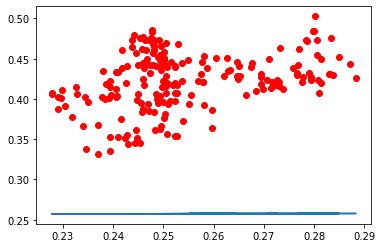

CPU times: user 6min 39s, sys: 3.35 s, total: 6min 42s
Wall time: 6min 41s


In [1253]:
%%time
batch_sz = 200
loss_df = pd.DataFrame()
loss_bin = []
# Train the model
model.train()

for batch in range(num_batchs):
    # Get data from generator
    cur_batch = data_generator(batch_sz)
    inputs = torch.tensor(cur_batch[:,1:-1][:,:-2].astype(np.single)).to(device)
    token_ids = torch.tensor(cur_batch[:,1:-1][:,-2:].astype(int)).to(device)
    target_outputs = torch.tensor(cur_batch[:,-1:].astype(np.single)).to(device)
    #print('inputs.shape: ',inputs.shape)
    
    # Forward pass
    outputs = model(inputs,token_ids)
    loss = criterion(outputs, target_outputs)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_bin.append(loss.item())
    
    if (batch+1) % 100 == 0:
        loss_df = loss_df.append(pd.DataFrame([(batch+1,sum(loss_bin)/len(loss_bin))],columns=['batch','loss'],index=[batch+1]))
        
    if (batch+1) % 1000 == 0:
        print ('Batch [{}/{}], Loss: {:.4f}'.format(batch+1, num_batchs, sum(loss_bin)/len(loss_bin)))
        ax=loss_df.iloc[-10000:].plot.scatter(x='batch',y='loss')
        #ax.set_ylim(0,.13)
        plt.show()
        loss_bin = []
        clear_output(wait=True)

# Plot the graph
with torch.no_grad():
    model.eval()
    predicted = model(inputs,token_ids).cpu().detach().numpy()
    plt.plot(inputs.cpu().detach().numpy()[:,-2], target_outputs.cpu().detach().numpy(), 'ro', label='Original data')
    plt.plot(inputs.cpu().detach().numpy()[:,-2], predicted[:,0], label='Fitted line')
    #plt.legend()
    plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

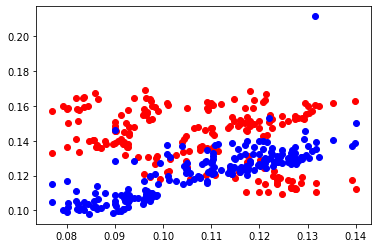

In [1254]:
cur_batch = data_generator()
inputs = torch.tensor(cur_batch[:,1:-1][:,:-2].astype(np.single)).to(device)
token_ids = torch.tensor(cur_batch[:,1:-1][:,-2:].astype(int)).to(device)
target_outputs = torch.tensor(cur_batch[:,-1:].astype(np.single)).to(device)

# Plot the graph
with torch.no_grad():
    model.eval()
    predicted = model(inputs,token_ids).cpu().detach().numpy()
    plt.plot(inputs.cpu().detach().numpy()[:,-2], target_outputs.cpu().detach().numpy(), 'ro', label='Original data')
    plt.plot(inputs.cpu().detach().numpy()[:,-2], predicted[:,0],'bo', label='Fitted line')
    #plt.legend()
    plt.show()

In [1255]:
p_embedding1 = model.emb1.weight.data.cpu().detach().numpy()
p_embedding2 = model.emb2.weight.data.cpu().detach().numpy()

In [1256]:
%%time
nb_classes = num_idx
emb_list = []
for i in range(num_idx):
    idx_vec1 = np.eye(nb_classes)[i]
    emb1_out = np.matmul(idx_vec1,p_embedding1)
    emb2_out = np.matmul(idx_vec1,p_embedding2)
    emb_list.append(np.concatenate((emb1_out,emb2_out)))
embedding_df = pd.DataFrame(emb_list, columns=['embedding_'+str(i+1) for i in range(6)])    
embedding_df

CPU times: user 1.05 ms, sys: 3.4 ms, total: 4.45 ms
Wall time: 3.76 ms


,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6
0,-0.755855,-1.187721,0.501990,-0.797387,-2.366914,-0.785528
1,0.438444,-0.095436,-0.841362,0.620950,1.794140,1.808398
2,1.948938,0.518035,0.893111,-3.609263,-2.489435,0.606221
3,-0.502150,-1.139256,-0.776533,-0.117737,-1.476906,0.082559
4,-0.911009,-3.538759,0.207288,-1.404201,-1.356857,9.927623
5,-0.280636,-0.433574,-0.680936,-0.218884,-0.377463,-0.186767
6,-0.392093,-0.394916,-0.039088,-0.411539,2.146857,1.234322
7,-1.460400,0.044233,-0.446063,0.401798,-1.274874,-0.731728
8,-0.355135,3.464312,2.153673,3.325201,2.498210,-1.167271
9,1.173741,1.665749,2.620819,2.045926,-0.475085,2.506972


In [1257]:
%%time
with torch.no_grad():
    model.eval()
    test_input = torch.tensor([i for i in range(num_idx)]).to(device)
    embedding_out = torch.cat((model.emb1(test_input),model.emb2(test_input)),axis=1).cpu().detach().numpy()
    
embedding_out[:10]

CPU times: user 1.18 ms, sys: 60 µs, total: 1.24 ms
Wall time: 689 µs


array([[-0.75585455, -1.1877211 ,  0.5019897 , -0.7973866 , -2.3669143 ,
        -0.7855281 ],
       [ 0.43844405, -0.09543595, -0.8413619 ,  0.6209504 ,  1.7941399 ,
         1.808398  ],
       [ 1.9489378 ,  0.5180348 ,  0.8931105 , -3.609263  , -2.4894354 ,
         0.606221  ],
       [-0.5021496 , -1.1392556 , -0.77653307, -0.11773691, -1.4769056 ,
         0.08255941],
       [-0.9110087 , -3.5387585 ,  0.20728788, -1.4042008 , -1.3568568 ,
         9.927623  ],
       [-0.2806361 , -0.43357393, -0.680936  , -0.21888395, -0.37746334,
        -0.18676691],
       [-0.39209297, -0.39491576, -0.03908801, -0.41153947,  2.146857  ,
         1.2343217 ],
       [-1.4604003 ,  0.0442327 , -0.4460626 ,  0.40179753, -1.2748743 ,
        -0.73172796],
       [-0.35513514,  3.4643118 ,  2.1536732 ,  3.3252008 ,  2.49821   ,
        -1.1672715 ],
       [ 1.1737413 ,  1.6657492 ,  2.6208193 ,  2.0459256 , -0.47508502,
         2.506972  ]], dtype=float32)

In [1258]:
meta_df['Market Category'].unique()

array(['Q', ' ', 'S', 'G'], dtype=object)

In [1259]:
color_cat = meta_df['Market Category'].str.replace(' ','y').replace('Q','r').replace('S','b').replace('G','w').values

In [1260]:
np.unique(color_cat)

array(['b', 'r', 'w', 'y'], dtype=object)

In [1261]:
X.shape

(54, 2)

In [1262]:
get_sector(get_ticker(0))

'Technology'

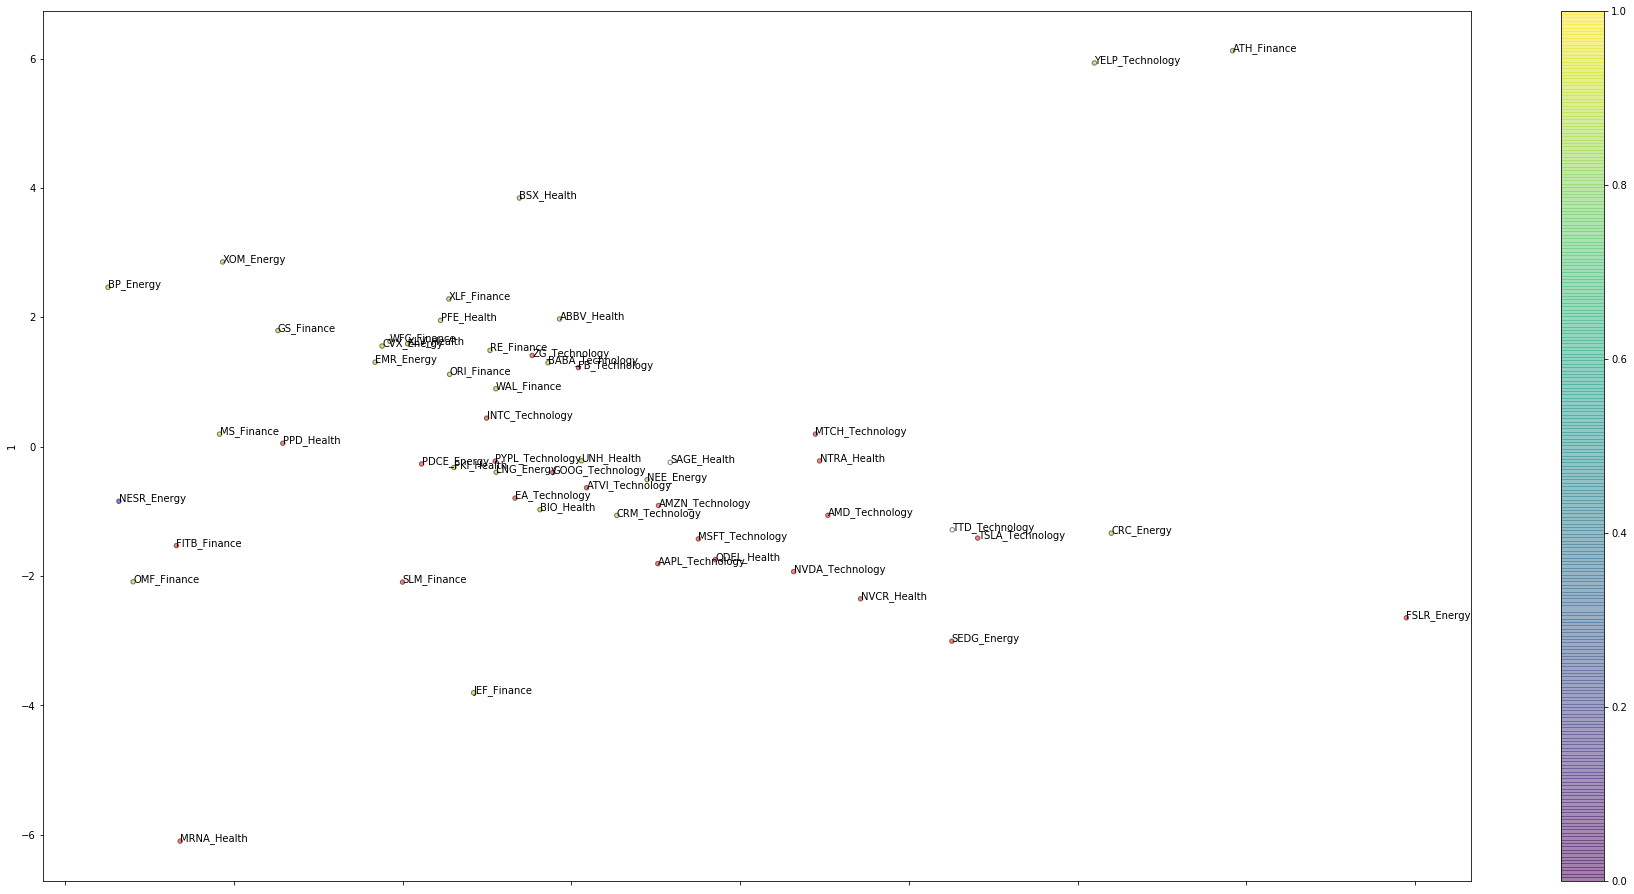

In [1264]:
pca = decomposition.PCA(n_components=2)

pca.fit(embedding_out)
X = pca.transform(embedding_out)
ax = pd.DataFrame(X).plot.scatter(0,1,c=color_cat,
           cmap=plt.cm.nipy_spectral,
           edgecolor='k',figsize=(32,16),alpha=.5)

for i in range(num_idx):
    ax.annotate(get_ticker(i)+'_'+get_sector(get_ticker(i)), (X[i][0], X[i][1]))


plt.show()

#### From previous run. Compare for consistency 

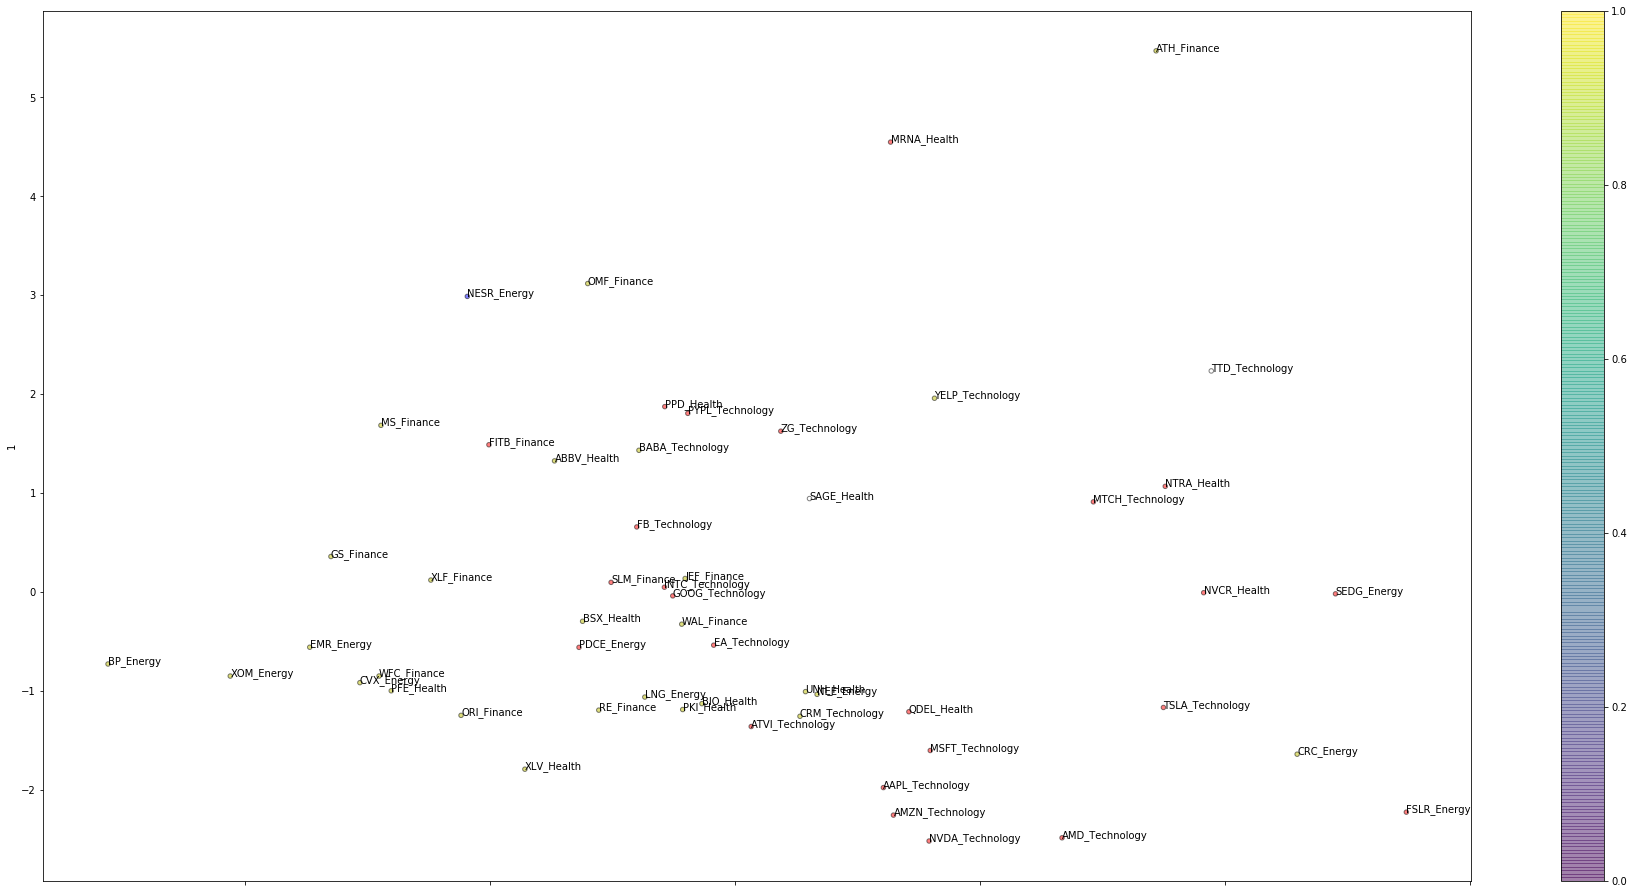

In [1240]:
pca = decomposition.PCA(n_components=2)

pca.fit(embedding_out)
X = pca.transform(embedding_out)
ax = pd.DataFrame(X).plot.scatter(0,1,c=color_cat,
           cmap=plt.cm.nipy_spectral,
           edgecolor='k',figsize=(32,16),alpha=.5)

for i in range(num_idx):
    ax.annotate(get_ticker(i)+'_'+get_sector(get_ticker(i)), (X[i][0], X[i][1]))


plt.show()